#SUPPORT VECTOR MACHINE

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Dataset Selection:

In [ ]:
data = pd.read_csv("/content/mushroom.csv")

In [ ]:
data

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1995         863    sunken       scaly     brown     yes     foul   
1996        1160    sunken       scaly    purple     yes    musty   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    partial   
1            notched      crowded    narrow  chocolate  ...  universal   
2         descending      crowded     broad     purple  ...  universal   
3            notched        close     broad     orange  ...    partial   
4               free      crowded    narrow     orange  ...  universal   
...              ...          ...       ...        ...  ...        ...   
1995        attached      crowded    narrow  chocolate  ...    partial   
1996        attached      distant    narrow        red  ...    partial   
1997         notched        close    narrow       pink  ...    partial   
1998            free        close    narrow     orange  ...  universal   
1999      descending        close    narrow     purple  ...    partial   

     veil_color ring_number   ring_type spore_print_color population  habitat  \
0         brown         two   sheathing         chocolate  clustered    waste   
1         brown         two   sheathing             brown   numerous    waste   
2        yellow         two   sheathing            purple   abundant    waste   
3        yellow         two    cobwebby             green  clustered  grasses   
4         white        none        none            yellow  clustered    urban   
...         ...         ...         ...               ...        ...      ...   
1995     orange         one     flaring            purple   abundant   leaves   
1996      white         one        zone            yellow   numerous    waste   
1997      brown         two  evanescent            yellow   abundant    woods   
1998     yellow         one    cobwebby             brown   solitary    woods   
1999      white         two       large             white   numerous    urban   

          class stalk_height cap_diameter  
0     poisonous    14.276173     5.054983  
1        edible     3.952715    19.068319  
2     poisonous     9.054265     7.205884  
3     poisonous     5.226499    20.932692  
4     poisonous    14.037532    12.545245  
...         ...          ...          ...  
1995  poisonous     5.877891    17.464145  
1996  poisonous     6.500840    13.501957  
1997  poisonous    13.558064    11.270020  
1998  poisonous    11.092703     8.423199  
1999  poisonous    13.066414    21.056642  

[2000 rows x 26 columns]

In [ ]:
data.head()

Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 26 columns]

#Task 1: Exploratory Data Analysis (EDA)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [ ]:
data.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [ ]:
data.describe()

Unnamed: 0  stalk_height  cap_diameter
count  2000.000000   2000.000000   2000.000000
mean    624.974000      8.449118     12.314345
std     375.091938      3.697217      7.048845
min       0.000000      2.000000      1.000000
25%     290.000000      5.291009      5.723521
50%     607.000000      8.318596     12.124902
75%     957.250000     11.781272     18.698605
max    1279.000000     15.095066     25.000054

In [ ]:
data.dropna()

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1995         863    sunken       scaly     brown     yes     foul   
1996        1160    sunken       scaly    purple     yes    musty   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    partial   
1            notched      crowded    narrow  chocolate  ...  universal   
2         descending      crowded     broad     purple  ...  universal   
3            notched        close     broad     orange  ...    partial   
4               free      crowded    narrow     orange  ...  universal   
...              ...          ...       ...        ...  ...        ...   
1995        attached      crowded    narrow  chocolate  ...    partial   
1996        attached      distant    narrow        red  ...    partial   
1997         notched        close    narrow       pink  ...    partial   
1998            free        close    narrow     orange  ...  universal   
1999      descending        close    narrow     purple  ...    partial   

     veil_color ring_number   ring_type spore_print_color population  habitat  \
0         brown         two   sheathing         chocolate  clustered    waste   
1         brown         two   sheathing             brown   numerous    waste   
2        yellow         two   sheathing            purple   abundant    waste   
3        yellow         two    cobwebby             green  clustered  grasses   
4         white        none        none            yellow  clustered    urban   
...         ...         ...         ...               ...        ...      ...   
1995     orange         one     flaring            purple   abundant   leaves   
1996      white         one        zone            yellow   numerous    waste   
1997      brown         two  evanescent            yellow   abundant    woods   
1998     yellow         one    cobwebby             brown   solitary    woods   
1999      white         two       large             white   numerous    urban   

          class stalk_height cap_diameter  
0     poisonous    14.276173     5.054983  
1        edible     3.952715    19.068319  
2     poisonous     9.054265     7.205884  
3     poisonous     5.226499    20.932692  
4     poisonous    14.037532    12.545245  
...         ...          ...          ...  
1995  poisonous     5.877891    17.464145  
1996  poisonous     6.500840    13.501957  
1997  poisonous    13.558064    11.270020  
1998  poisonous    11.092703     8.423199  
1999  poisonous    13.066414    21.056642  

[2000 rows x 26 columns]

In [ ]:
data[data.duplicated()]

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
34          1279      bell      smooth      pink      no     foul   
70          1275    sunken       scaly    yellow      no  pungent   
76           549   conical     grooves     brown      no     foul   
109         1198    sunken      smooth     white      no    anise   
127         1167    sunken       scaly     white      no    anise   
...          ...       ...         ...       ...     ...      ...   
1993         618      flat     grooves     green     yes    musty   
1994         871      flat       scaly      pink      no    spicy   
1995         863    sunken       scaly     brown     yes     foul   
1997         265    convex     grooves     green     yes    fishy   
1998         411      bell      smooth     white      no  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
34           notched      distant     broad       pink  ...  universal   
70        descending      distant    narrow     orange  ...    partial   
76              free      distant     broad      white  ...    partial   
109         attached      crowded     broad      black  ...    partial   
127       descending      distant     broad       pink  ...    partial   
...              ...          ...       ...        ...  ...        ...   
1993         notched      crowded     broad  chocolate  ...  universal   
1994        attached      distant    narrow        red  ...  universal   
1995        attached      crowded    narrow  chocolate  ...    partial   
1997         notched        close    narrow       pink  ...    partial   
1998            free        close    narrow     orange  ...  universal   

     veil_color ring_number   ring_type spore_print_color population  habitat  \
34        brown         one        zone             black  scattered   leaves   
70        white        none        zone             white   numerous   leaves   
76       yellow         two       large         chocolate   solitary    woods   
109       brown         two   sheathing             black   solitary    woods   
127       brown         two   sheathing         chocolate  clustered    waste   
...         ...         ...         ...               ...        ...      ...   
1993     yellow         one        zone             brown   abundant  meadows   
1994      brown         two        zone             brown   abundant  meadows   
1995     orange         one     flaring            purple   abundant   leaves   
1997      brown         two  evanescent            yellow   abundant    woods   
1998     yellow         one    cobwebby             brown   solitary    woods   

          class stalk_height cap_diameter  
34    poisonous     5.291009     5.436304  
70    poisonous     4.746453    10.769935  
76    poisonous    12.206952     5.061715  
109      edible    13.214007    14.549171  
127   poisonous    14.276173     5.054983  
...         ...          ...          ...  
1993  poisonous    14.834383     2.053744  
1994  poisonous     4.794826     4.576464  
1995  poisonous     5.877891    17.464145  
1997  poisonous    13.558064    11.270020  
1998  poisonous    11.092703     8.423199  

[1024 rows x 26 columns]

In [ ]:
data=data.drop_duplicates()
data

Unnamed: 0 cap_shape cap_surface cap_color bruises     odor  \
0           1167    sunken       scaly     white      no    anise   
1           1037    sunken     fibrous       red      no    anise   
2            309      flat     grooves    purple     yes     foul   
3            282      bell       scaly      pink     yes    fishy   
4            820      flat      smooth    yellow     yes    musty   
...          ...       ...         ...       ...     ...      ...   
1985         877   conical     grooves     brown      no     foul   
1988         926      bell     grooves      pink     yes    anise   
1989         289    sunken      smooth    purple     yes    anise   
1996        1160    sunken       scaly    purple     yes    musty   
1999        1073    convex       scaly    yellow     yes  pungent   

     gill_attachment gill_spacing gill_size gill_color  ...  veil_type  \
0         descending      distant     broad       pink  ...    partial   
1            notched      crowded    narrow  chocolate  ...  universal   
2         descending      crowded     broad     purple  ...  universal   
3            notched        close     broad     orange  ...    partial   
4               free      crowded    narrow     orange  ...  universal   
...              ...          ...       ...        ...  ...        ...   
1985         notched      crowded     broad  chocolate  ...  universal   
1988      descending      distant     broad      brown  ...    partial   
1989      descending      crowded    narrow       buff  ...  universal   
1996        attached      distant    narrow        red  ...    partial   
1999      descending        close    narrow     purple  ...    partial   

     veil_color ring_number  ring_type spore_print_color population  habitat  \
0         brown         two  sheathing         chocolate  clustered    waste   
1         brown         two  sheathing             brown   numerous    waste   
2        yellow         two  sheathing            purple   abundant    waste   
3        yellow         two   cobwebby             green  clustered  grasses   
4         white        none       none            yellow  clustered    urban   
...         ...         ...        ...               ...        ...      ...   
1985      brown        none      large             brown   numerous    paths   
1988      brown         two    pendant            yellow   numerous  grasses   
1989     orange         two       none            orange   abundant  grasses   
1996      white         one       zone            yellow   numerous    waste   
1999      white         two      large             white   numerous    urban   

          class stalk_height cap_diameter  
0     poisonous    14.276173     5.054983  
1        edible     3.952715    19.068319  
2     poisonous     9.054265     7.205884  
3     poisonous     5.226499    20.932692  
4     poisonous    14.037532    12.545245  
...         ...          ...          ...  
1985     edible    13.020616     9.993008  
1988  poisonous     3.751597    18.868135  
1989     edible    13.134058    15.740028  
1996  poisonous     6.500840    13.501957  
1999  poisonous    13.066414    21.056642  

[976 rows x 26 columns]

**Task 2: Data Preprocessing**

In [ ]:
#converting categorical to numerical
from sklearn.preprocessing import LabelEncoder
label_encoder={}
for column in data.select_dtypes(include=['object']).columns:
    label_encoder[column]=LabelEncoder()
    data[column] = label_encoder[column].fit_transform(data[column])
data


Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0           1167          4            2          7        0     1   
1           1037          4            0          6        0     1   
2            309          3            1          5        1     4   
3            282          0            2          4        1     3   
4            820          3            3          8        1     5   
...          ...        ...          ...        ...      ...   ...   
1985         877          1            1          0        0     4   
1988         926          0            1          4        1     1   
1989         289          4            3          5        1     1   
1996        1160          4            2          5        1     5   
1999        1073          2            2          8        1     7   

      gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                   1             2          0           7  ...          0   
1                   3             1          1           3  ...          1   
2                   1             1          0           8  ...          1   
3                   3             0          0           6  ...          0   
4                   2             1          1           6  ...          1   
...               ...           ...        ...         ...  ...        ...   
1985                3             1          0           3  ...          1   
1988                1             2          0           1  ...          0   
1989                1             1          1           2  ...          1   
1996                0             2          1           9  ...          0   
1999                1             0          1           8  ...          0   

      veil_color  ring_number  ring_type  spore_print_color  population  \
0              0            2          6                  3           1   
1              0            2          6                  1           2   
2              3            2          6                  6           0   
3              3            2          0                  4           1   
4              2            0          4                  8           1   
...          ...          ...        ...                ...         ...   
1985           0            0          3                  1           2   
1988           0            2          5                  8           2   
1989           1            2          4                  5           0   
1996           2            1          7                  8           2   
1999           2            2          3                  7           2   

      habitat  class  stalk_height  cap_diameter  
0           5      1     14.276173      5.054983  
1           5      0      3.952715     19.068319  
2           5      1      9.054265      7.205884  
3           0      1      5.226499     20.932692  
4           4      1     14.037532     12.545245  
...       ...    ...           ...           ...  
1985        3      0     13.020616      9.993008  
1988        0      1      3.751597     18.868135  
1989        0      0     13.134058     15.740028  
1996        5      1      6.500840     13.501957  
1999        4      1     13.066414     21.056642  

[976 rows x 26 columns]

In [ ]:
data.corr()

Unnamed: 0  cap_shape  cap_surface  cap_color  \
Unnamed: 0                  1.000000  -0.002662    -0.025126   0.040939   
cap_shape                  -0.002662   1.000000     0.024645   0.020694   
cap_surface                -0.025126   0.024645     1.000000   0.010129   
cap_color                   0.040939   0.020694     0.010129   1.000000   
bruises                    -0.019980  -0.007043    -0.013355   0.007862   
odor                       -0.018715  -0.035072    -0.001229  -0.056524   
gill_attachment            -0.016446   0.017091    -0.008412   0.000201   
gill_spacing                0.043219  -0.026279     0.033273   0.001367   
gill_size                   0.025476   0.017675    -0.046493   0.034965   
gill_color                  0.018908   0.050239     0.033423   0.005884   
stalk_shape                -0.032525  -0.013837    -0.012625  -0.015452   
stalk_root                  0.030277   0.052715    -0.021370   0.006823   
stalk_surface_above_ring   -0.044551  -0.048211     0.034439  -0.038396   
stalk_surface_below_ring   -0.071486   0.006413    -0.011787   0.004605   
stalk_color_above_ring      0.003525  -0.038000    -0.051801  -0.003503   
stalk_color_below_ring     -0.006987  -0.018025    -0.003789  -0.007788   
veil_type                   0.032241  -0.015447    -0.042954  -0.008664   
veil_color                  0.003575  -0.004381     0.027026  -0.027817   
ring_number                -0.068662   0.038398     0.005017   0.037536   
ring_type                  -0.000326   0.012335     0.002838   0.023527   
spore_print_color          -0.004192   0.008641    -0.057301   0.045805   
population                  0.007227   0.009890    -0.026943  -0.039548   
habitat                     0.033891  -0.003017    -0.038786  -0.006857   
class                       0.021431   0.008132    -0.047799  -0.048735   
stalk_height                0.000815  -0.019087     0.026016   0.026948   
cap_diameter                0.042726   0.015284     0.030579   0.006289   

                           bruises      odor  gill_attachment  gill_spacing  \
Unnamed: 0               -0.019980 -0.018715        -0.016446      0.043219   
cap_shape                -0.007043 -0.035072         0.017091     -0.026279   
cap_surface              -0.013355 -0.001229        -0.008412      0.033273   
cap_color                 0.007862 -0.056524         0.000201      0.001367   
bruises                   1.000000  0.051111         0.006422     -0.017566   
odor                      0.051111  1.000000        -0.013212     -0.030698   
gill_attachment           0.006422 -0.013212         1.000000     -0.024634   
gill_spacing             -0.017566 -0.030698        -0.024634      1.000000   
gill_size                -0.004689 -0.057671        -0.011606      0.012648   
gill_color               -0.033166 -0.030782         0.026293     -0.004135   
stalk_shape               0.035013 -0.003433        -0.021527      0.060430   
stalk_root               -0.000106 -0.001555        -0.018382     -0.003949   
stalk_surface_above_ring -0.041081  0.048396        -0.000495     -0.019223   
stalk_surface_below_ring -0.002800 -0.025388        -0.011155     -0.038614   
stalk_color_above_ring    0.013911  0.003075        -0.015330     -0.001535   
stalk_color_below_ring   -0.088043  0.014668         0.026026     -0.002366   
veil_type                 0.007497  0.022875        -0.044643     -0.027653   
veil_color               -0.023444  0.033718        -0.005227     -0.003433   
ring_number              -0.037722 -0.031397         0.048239      0.009182   
ring_type                -0.067596  0.005064        -0.049124      0.008323   
spore_print_color        -0.028591 -0.078276        -0.020564      0.023472   
population                0.014990 -0.000816         0.003722      0.005042   
habitat                   0.011681 -0.021675        -0.020783      0.024691   
class                    -0.007932  0.009625        -0.023758      0.045121   
stalk_height             

**Task 3: Data Visualization**

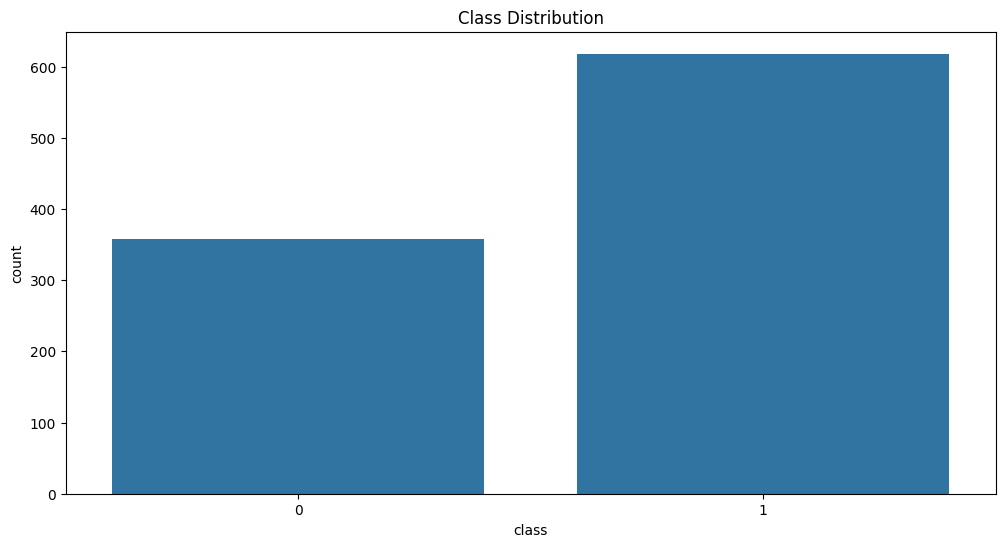

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.show()

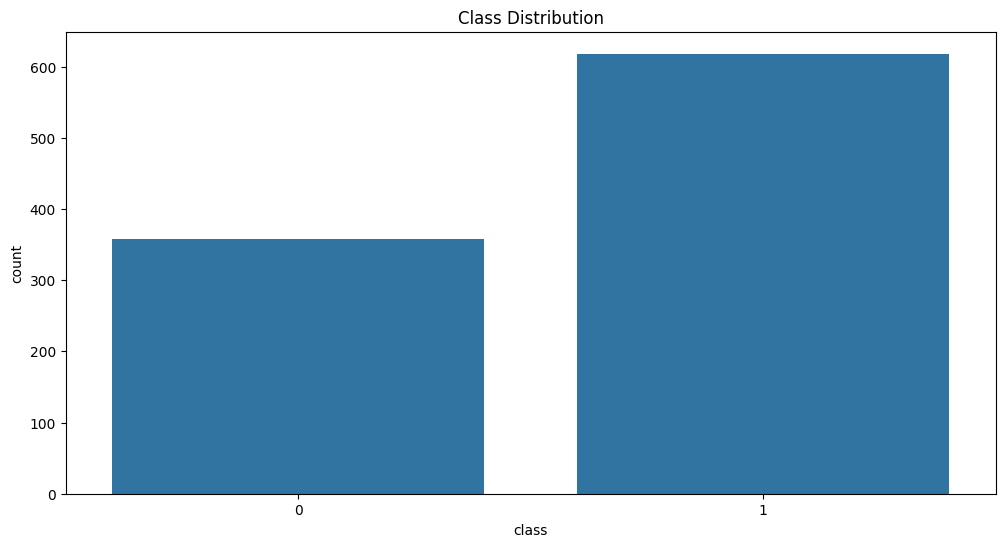

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='class', data=data)
plt.title('Class Distribution')
plt.show()

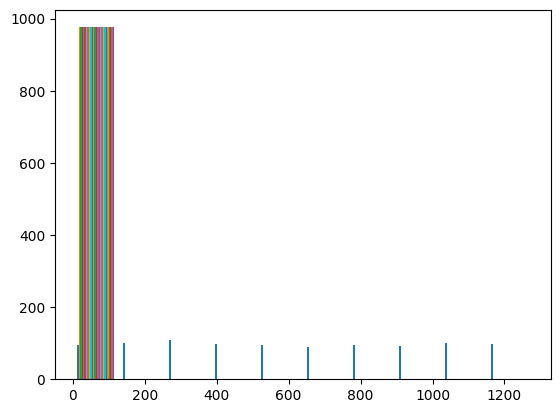

In [ ]:
plt.hist(data)
plt.show()

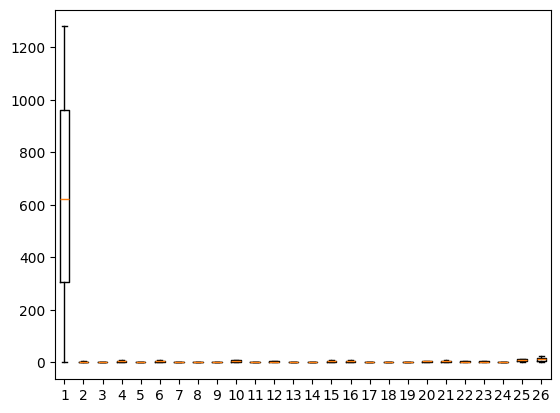

In [ ]:
plt.boxplot(data)
plt.show()

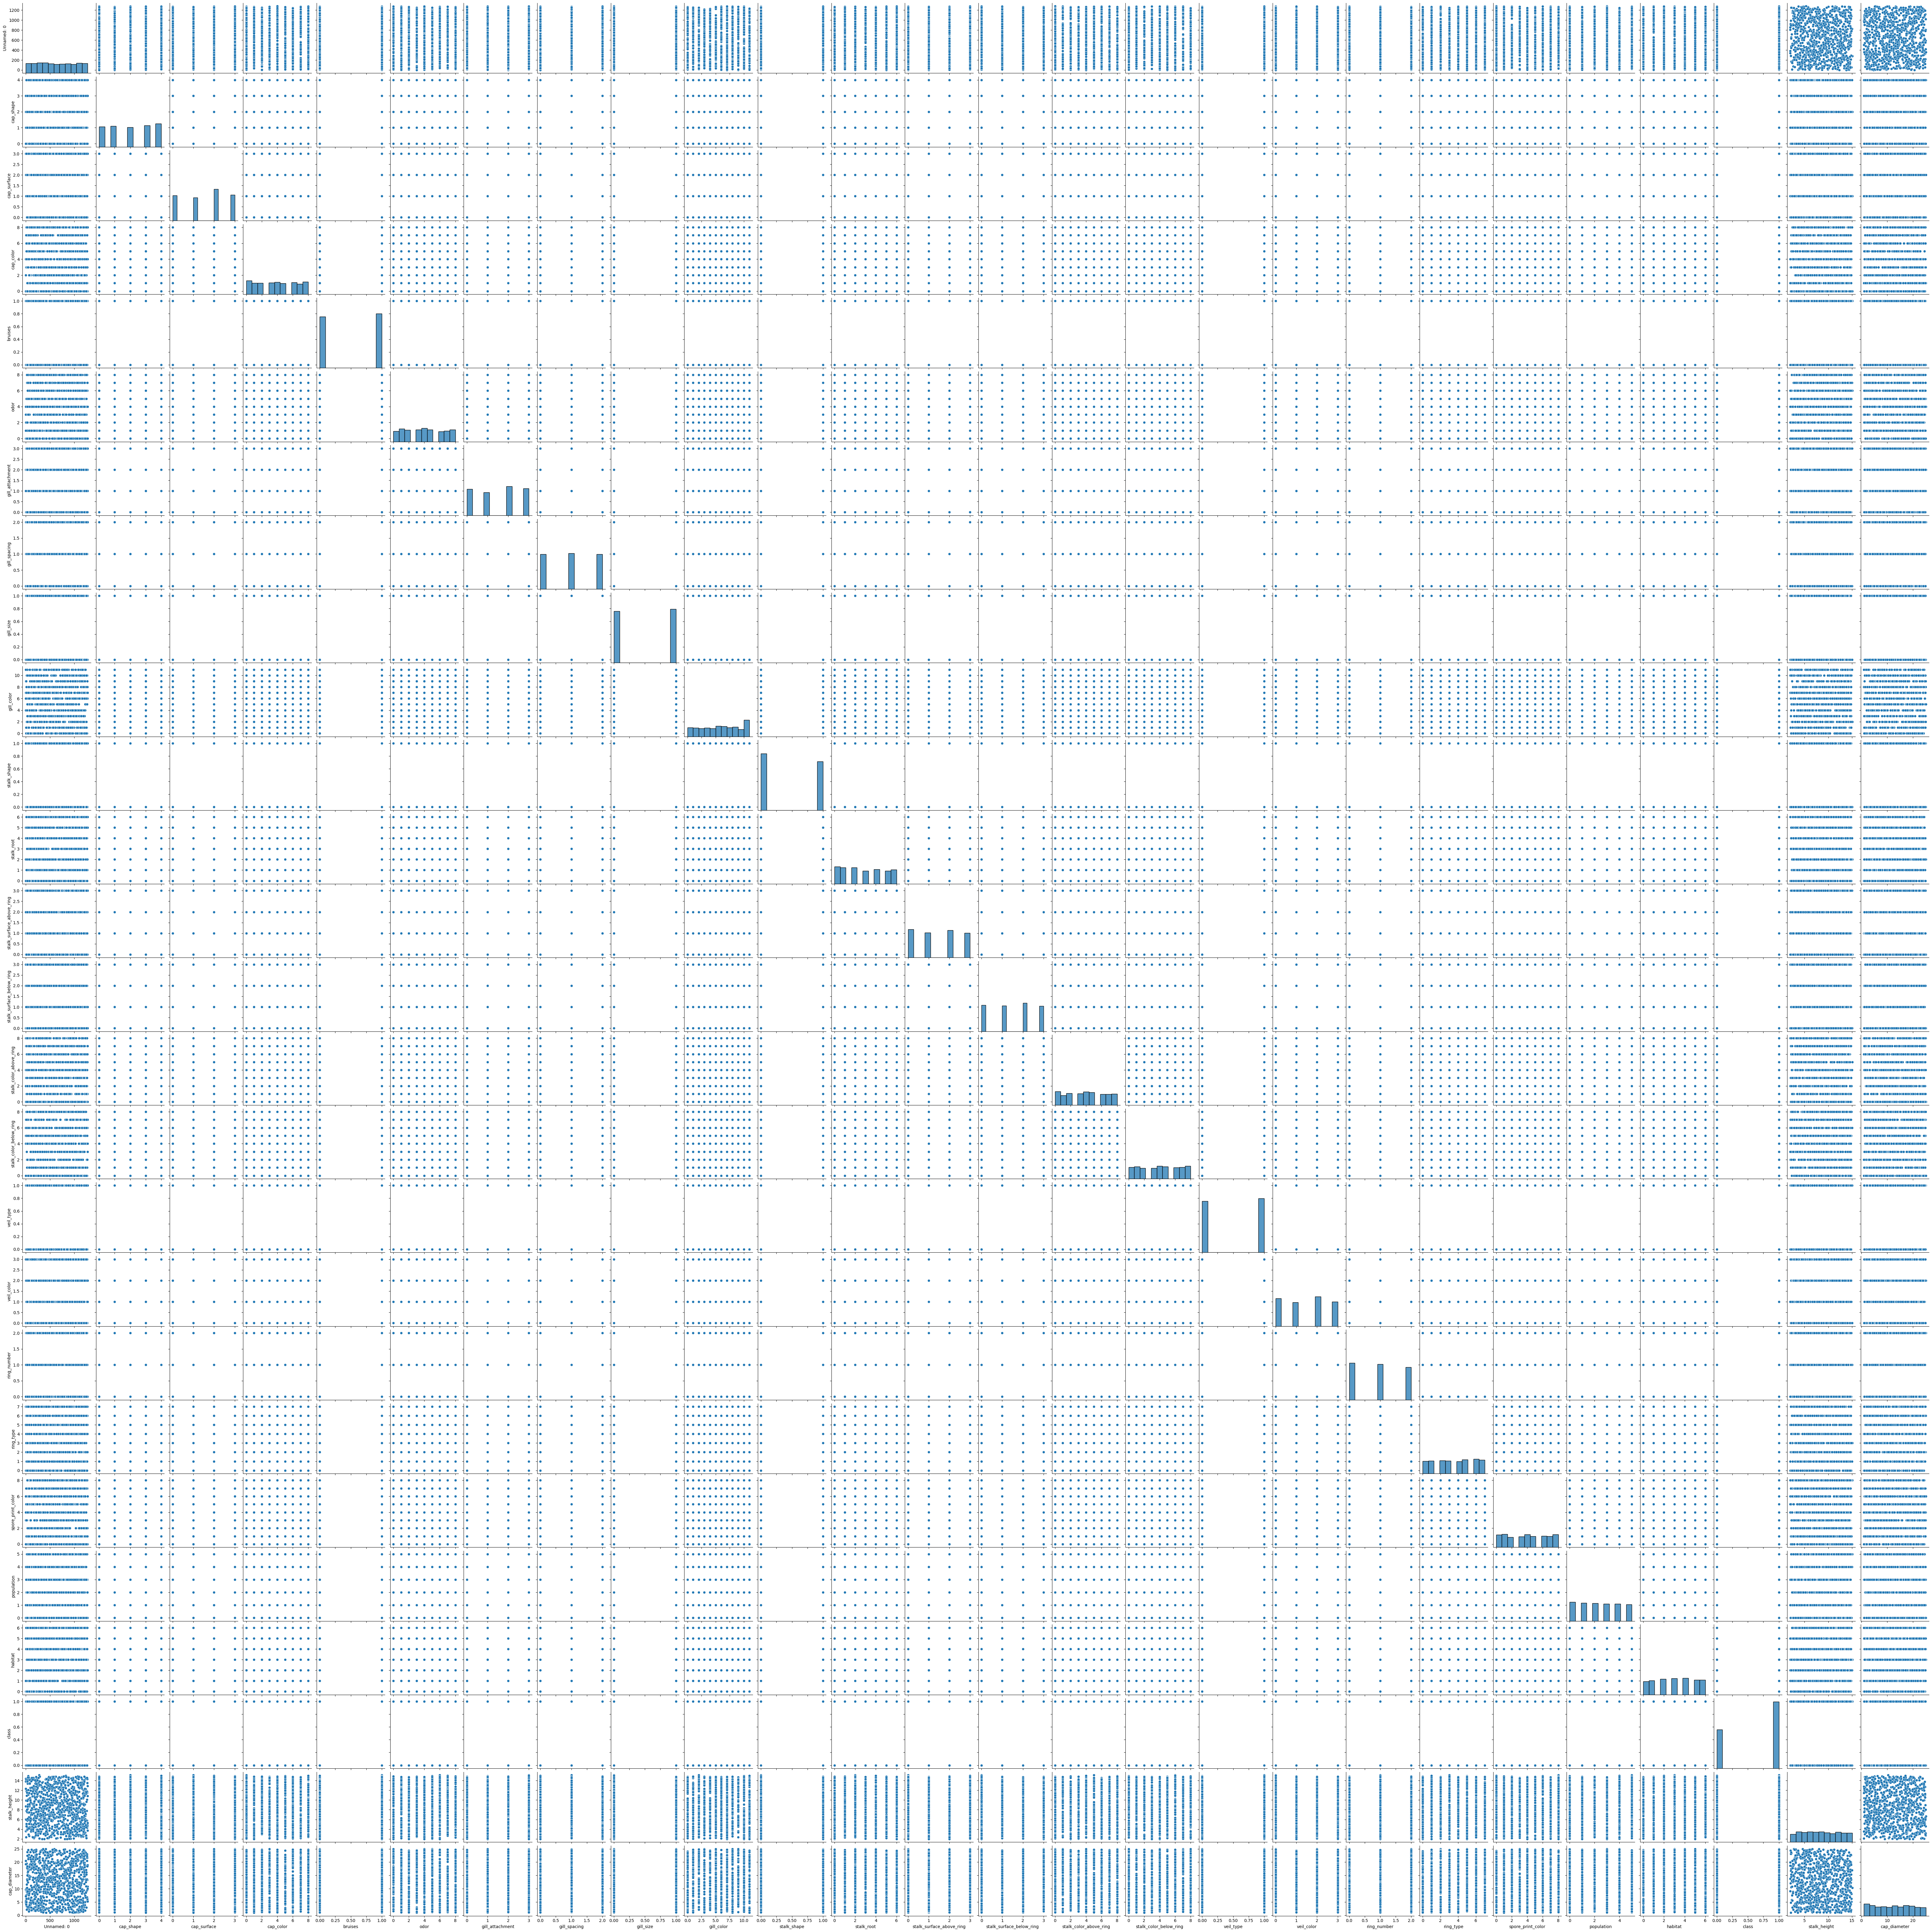

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
# Convert all float values to integers
data = data.applymap(lambda x: int(round(x)) if isinstance(x, float) else x)
data

Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
0           1167          4            2          7        0     1   
1           1037          4            0          6        0     1   
2            309          3            1          5        1     4   
3            282          0            2          4        1     3   
4            820          3            3          8        1     5   
...          ...        ...          ...        ...      ...   ...   
1985         877          1            1          0        0     4   
1988         926          0            1          4        1     1   
1989         289          4            3          5        1     1   
1996        1160          4            2          5        1     5   
1999        1073          2            2          8        1     7   

      gill_attachment  gill_spacing  gill_size  gill_color  ...  veil_type  \
0                   1             2          0           7  ...          0   
1                   3             1          1           3  ...          1   
2                   1             1          0           8  ...          1   
3                   3             0          0           6  ...          0   
4                   2             1          1           6  ...          1   
...               ...           ...        ...         ...  ...        ...   
1985                3             1          0           3  ...          1   
1988                1             2          0           1  ...          0   
1989                1             1          1           2  ...          1   
1996                0             2          1           9  ...          0   
1999                1             0          1           8  ...          0   

      veil_color  ring_number  ring_type  spore_print_color  population  \
0              0            2          6                  3           1   
1              0            2          6                  1           2   
2              3            2          6                  6           0   
3              3            2          0                  4           1   
4              2            0          4                  8           1   
...          ...          ...        ...                ...         ...   
1985           0            0          3                  1           2   
1988           0            2          5                  8           2   
1989           1            2          4                  5           0   
1996           2            1          7                  8           2   
1999           2            2          3                  7           2   

      habitat  class  stalk_height  cap_diameter  
0           5      1            14             5  
1           5      0             4            19  
2           5      1             9             7  
3           0      1             5            21  
4           4      1            14            13  
...       ...    ...           ...           ...  
1985        3      0            13            10  
1988        0      1             4            19  
1989        0      0            13            16  
1996        5      1             7            14  
1999        4      1            13            21  

[976 rows x 26 columns]

In [ ]:
#spliting the data
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x,y

(      Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
 0           1167          4            2          7        0     1   
 1           1037          4            0          6        0     1   
 2            309          3            1          5        1     4   
 3            282          0            2          4        1     3   
 4            820          3            3          8        1     5   
 ...          ...        ...          ...        ...      ...   ...   
 1985         877          1            1          0        0     4   
 1988         926          0            1          4        1     1   
 1989         289          4            3          5        1     1   
 1996        1160          4            2          5        1     5   
 1999        1073          2            2          8        1     7   
 
       gill_attachment  gill_spacing  gill_size  gill_color  ...  \
 0                   1             2          0           7  ...   
 1        

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
x_train,y_train

(      Unnamed: 0  cap_shape  cap_surface  cap_color  bruises  odor  \
 990          567          2            0          0        0     0   
 899          104          4            2          5        1     5   
 33           699          1            0          4        0     2   
 31           277          2            0          6        1     7   
 1591         940          3            3          7        0     3   
 ...          ...        ...          ...        ...      ...   ...   
 110          602          2            2          3        0     8   
 301          134          1            0          0        1     6   
 1512         276          3            1          8        0     1   
 536           51          2            3          4        1     0   
 105         1147          4            3          1        0     4   
 
       gill_attachment  gill_spacing  gill_size  gill_color  ...  \
 990                 3             1          0          10  ...   
 899      

In [ ]:
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train,x_test

(array([[-0.17799506, -0.0286743 , -1.4104593 , ..., -0.52912275,
         -1.31425748, -0.41649297],
        [-1.41798608,  1.36919761,  0.3960403 , ..., -0.01451459,
         -1.31425748,  0.92925896],
        [ 0.1755229 , -0.72761025, -1.4104593 , ...,  0.50009358,
          0.76088591,  0.39095819],
        ...,
        [-0.95734146,  0.67026166, -0.5072095 , ..., -0.52912275,
         -1.31425748, -1.22394413],
        [-1.55992889, -0.0286743 ,  1.29929009, ...,  0.50009358,
          0.76088591, -0.41649297],
        [ 1.37534143,  1.36919761,  1.29929009, ...,  1.5293099 ,
          0.76088591,  0.1218078 ]]),
 array([[ 1.43961742, -1.42654621,  1.29929009, ..., -1.04373092,
          0.76088591, -1.22394413],
        [-0.05212124,  0.67026166, -1.4104593 , ...,  1.5293099 ,
          0.76088591, -0.68564335],
        [-0.45652436, -0.0286743 ,  1.29929009, ...,  0.50009358,
          0.76088591, -1.7622449 ],
        ...,
        [-0.36011037,  1.36919761, -1.4104593 , ..., -

#Task 4: SVM Implementation

In [ ]:
from sklearn import svm
svm_model=svm.SVC(kernel='linear')


In [ ]:
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
y_pred_test=svm_model.predict(x_test)
y_pred_test

array([18, 25, 21,  5, 11,  5,  6,  9, 18,  5, 18, 24, 16, 12, 12,  7, 25,
       22, 24, 25, 17,  6,  7, 18,  5,  7,  6,  5, 14,  9,  4,  3, 23,  1,
       14,  4,  1, 10, 19,  9, 11,  2, 17, 11, 20, 24, 10,  5, 23, 25, 24,
       10,  1,  5, 15,  4,  7, 13, 18, 17,  6, 16, 21,  5, 14, 11, 21, 24,
       11, 22, 23,  2, 18, 22, 11,  4, 17,  5, 10, 13, 18, 23,  5, 23, 24,
       10,  2,  8,  3,  8, 21, 23, 14,  8, 10, 25, 10,  5, 10,  3,  3,  6,
        5,  8, 20, 20,  5,  5, 12, 20, 18, 12,  3,  3, 13, 12, 20,  5, 11,
       19,  8, 22,  2, 10, 20, 18, 17,  6, 11,  9, 12,  2, 14, 14, 24,  4,
        5,  2, 17, 23,  5, 19,  2,  9, 21, 21, 18,  5, 16,  2, 18, 21, 15,
       17, 23, 19, 16,  3, 22, 14, 20,  5, 19,  5, 17, 23,  2,  5, 23, 16,
       23, 23, 17, 21, 17,  5,  3,  8,  9,  5,  3, 22, 17, 18, 19, 17, 11,
        8, 23, 23, 24, 16, 18,  7, 22,  4])

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
cf=classification_report(y_pred_test,y_test)
print('classification_report',cf)

classification_report               precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         9
           3       0.09      0.11      0.10         9
           4       0.00      0.00      0.00         6
           5       0.18      0.09      0.12        23
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         7
           9       0.10      0.17      0.12         6
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00         9
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         3
          14       0.08      0.14      0.11         7
          15       0.00      0.00      0.00         2
          16       0.07      0.17      0.10         6
          17       0.10      0.08      0.09        12
     

In [ ]:
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)

Accuracy: 0.05102040816326531


In [ ]:
cm=confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:",cm)


Confusion Matrix: [[0 2 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
 [0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
 [2 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 2 0 0 1 0 0]
 [0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 2 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1]
 [0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 2 0 1 0 1 0 1 0]
 [0 0 1 0 3 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 1 0 0 2 0 1 0 0 0 2 0 1 1 0 0 0 0]
 [0 0 1 0 3 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 2 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0]
 [0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0]
 [0 0 0 1 2 0 1 0 0 0 2 0 2 0 0 0 0 1 0 0 1 0 1 1 0]
 [1 0 0 0 2 2 0 0 0 0 1 0 0 0 1 1 2 0 0 0 0 1 2 1 0]
 [0 0 0 1 2 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 2 1 0]
 [0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 2]
 [0 1 2 0 0 0 0 0 0 1 0 0 0 

#Task 5: Visualization of SVM Results

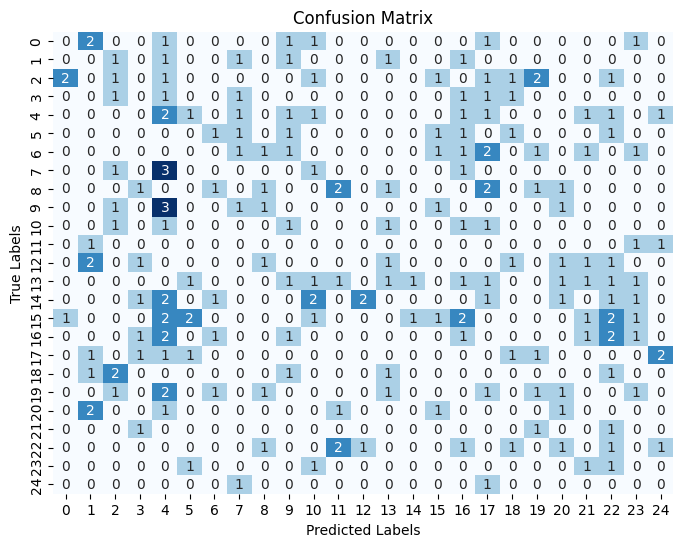

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#Task 6 & 7: Comparison and Analysis

In [ ]:
# Experiment with different SVM hyperparameters
# Example: Experimenting with different kernel types
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(x_train, y_train)
    y_pred = svm_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Kernel:", kernel)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

Kernel: linear
Accuracy: 0.05102040816326531
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         6
           3       0.11      0.09      0.10        11
           4       0.00      0.00      0.00         6
           5       0.09      0.18      0.12        11
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         6
           9       0.17      0.10      0.12        10
          10       0.00      0.00      0.00         8
          11       0.00      0.00      0.00         6
          12       0.00      0.00      0.00         3
          13       0.00      0.00      0.00         9
          14       0.14      0.08      0.11        12
          15       0.00      0.00      0.00        12
          16       0.17      0.07      0.10        14
          17       0.08      0.10   